In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

sns.set()

In [100]:
customers = pd.read_csv("Mall_Customers.csv")

In [101]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
index = customers["CustomerID"]
customers = customers.set_index(customers["CustomerID"])
customers.drop(["CustomerID"], axis = 1, inplace = True)

<AxesSubplot:>

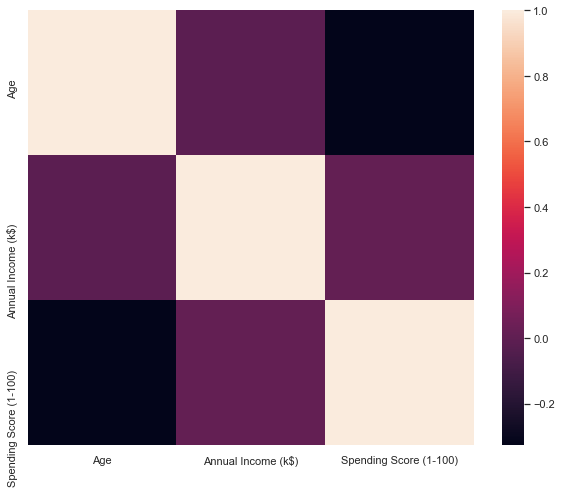

In [103]:
corr = customers.corr()
sns.heatmap(corr)

Analizando la matriz de correlaciones no hay correlaciones fuertes

In [104]:
customers.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No hay valores nulos.

In [105]:
customers.duplicated().value_counts()

False    200
dtype: int64

Ni tampoco filas duplicadas

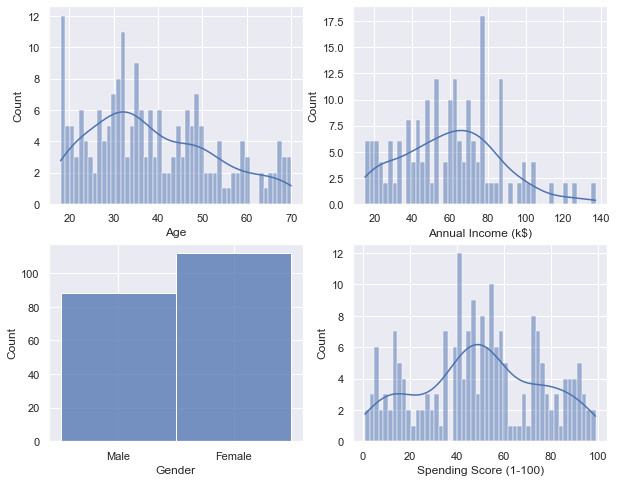

In [106]:
plt.rcParams["figure.figsize"] = (10,8)

f, ax = plt.subplots(2,2)
sns.histplot(customers["Age"] , kde = True, bins = 50, ax = ax[0,0] )
sns.histplot(customers["Gender"], ax = ax[1,0])
sns.histplot(customers["Annual Income (k$)"] , kde = True, bins = 50, ax = ax[0,1])
sns.histplot(customers["Spending Score (1-100)"] , kde = True, bins = 50, ax = ax[1,1])
plt.show()

Observando la distribución de cada variable

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

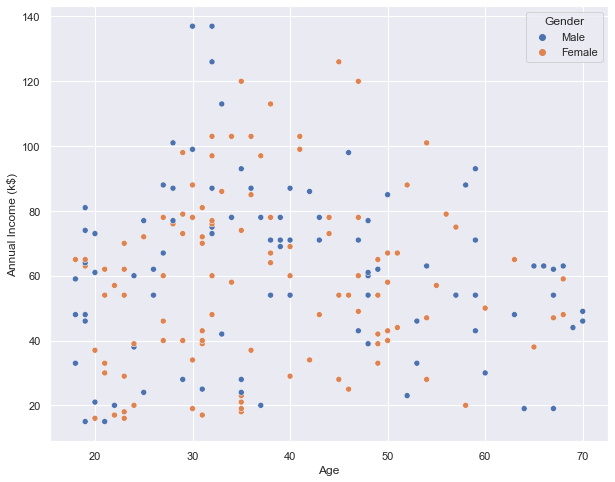

In [107]:
sns.scatterplot(data=customers, x="Age", y="Annual Income (k$)", hue = "Gender")


Observando como se relaciona la edad con el ingreso anual

In [108]:
customers = pd.get_dummies(customers, drop_first= True)
customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


Añadiendo variable dummy

In [109]:
scaler = StandardScaler()
data = scaler.fit_transform(customers)
data = pd.DataFrame(data, columns = customers.columns.tolist())
data.set_index(index)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1.128152
2,-1.281035,-1.738999,1.195704,1.128152
3,-1.352802,-1.700830,-1.715913,-0.886405
4,-1.137502,-1.700830,1.040418,-0.886405
5,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
196,-0.276302,2.268791,1.118061,-0.886405
197,0.441365,2.497807,-0.861839,-0.886405
198,-0.491602,2.497807,0.923953,1.128152


Normalizando 

# Análisis de clusters con KMeans

In [153]:
distorcion = []
silueta = []
k = np.arange(2,15)
for n in k:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    preds = kmeans.fit_predict(data)
    distorcion.append(kmeans.inertia_)
    silueta.append(silhouette_score(data, preds))

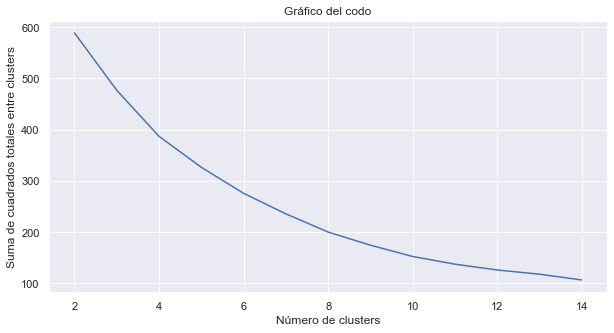

In [154]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(k,distorcion)
plt.xlabel("Número de clusters")
plt.ylabel("Suma de cuadrados totales entre clusters")
plt.title("Gráfico del codo")
plt.show()

In [157]:
pd.DataFrame({"Número de Clusters":k , "Coef de Silueta":silueta} )

,Número de Clusters,Coef de Silueta
0,2,0.251815
1,3,0.259715
2,4,0.301232
3,5,0.316150
4,6,0.320287
5,7,0.357369
6,8,0.387381
7,9,0.402721
8,10,0.420112
9,11,0.430427


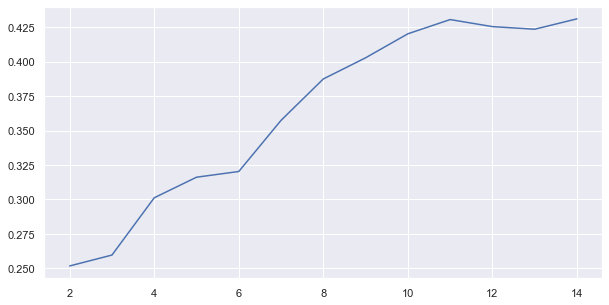

In [159]:
plt.plot(k,silueta)